# Stocks

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ig
import datetime as dt

## API Setup

In [8]:
details = ig.get_api('prod')
api = ig.APIHandler(details['url'], details['api_key'], details['user_name'], details['password'])
del details

## Price Analysis

### Historic Price Retrieval

In [9]:
# api.markets(93334)
prices = api.prices('IX.D.FTSE.DAILY.IP', resolution='HOUR',
                 from_date='2020-08-13 09:00:00', to_date='2020-08-14 11:00:00')

https://api.ig.com/gateway/deal/prices/IX.D.FTSE.DAILY.IP/HOUR/2020-08-13%2009%3A00%3A00/2020-08-14%2011%3A00%3A00


### Data Manipulation

In [102]:
price_cols = prices[[p for p in prices.columns if 'Price' in p]]
df = pd.DataFrame(index=price_cols.index)
for col in price_cols.columns:
    new_cols = price_cols[col].apply(pd.Series)
    new_cols.columns = [col.replace('Price', '') + '_' + new_col for new_col in new_cols.columns]
    df = df.join(new_cols, rsuffix='_' + col.replace('Price', ''))
df = df.join(prices[[p for p in prices.columns if 'Price' not in p]])

In [104]:
df = df.rename(columns={'snapshotTime': 'time', 'lastTradedVolume': 'volume'}).dropna(axis=1)
df.time = pd.to_datetime(df.time)

# df.time = pd.to_datetime(df.time)
df[df.time < dt.datetime(2020, 8, 14)]
col_list = df.columns.to_list()
time_idx = col_list.index('time')
new = ['time'] + col_list[:time_idx] + col_list[time_idx + 1:]
df = df[new]

['time', 'open_bid', 'open_ask', 'close_bid', 'close_ask', 'high_bid', 'high_ask', 'low_bid', 'low_ask', 'volume']


,time,open_bid,open_ask,close_bid,close_ask,high_bid,high_ask,low_bid,low_ask,volume
0,2020-08-13 09:00:00,6213.8,6214.8,6214.0,6215.0,6217.5,6218.5,6198.3,6199.3,5418
1,2020-08-13 10:00:00,6213.8,6214.8,6219.0,6220.0,6225.8,6226.8,6212.5,6213.5,4175
2,2020-08-13 11:00:00,6218.8,6219.8,6207.3,6208.3,6227.3,6228.3,6205.3,6206.3,4299
3,2020-08-13 12:00:00,6207.5,6208.5,6214.5,6215.5,6217.0,6218.0,6206.0,6207.0,3665
4,2020-08-13 13:00:00,6214.2,6215.2,6216.5,6217.5,6219.5,6220.5,6203.5,6204.5,4357
5,2020-08-13 14:00:00,6216.0,6217.0,6197.7,6198.7,6217.7,6218.7,6188.5,6189.5,10353
6,2020-08-13 15:00:00,6197.5,6198.5,6191.6,6192.6,6200.8,6201.8,6187.6,6188.6,8984
7,2020-08-13 16:00:00,6191.8,6192.8,6185.3,6187.3,6198.3,6199.6,6180.6,6182.6,14237
8,2020-08-13 17:00:00,6185.6,6187.6,6191.1,6193.1,6193.3,6195.3,6185.1,6187.1,1751
9,2020-08-13 18:00:00,6191.3,6193.3,6186.6,6188.6,6193.3,6195.3,6177.8,6179.8,1138


### Analysis

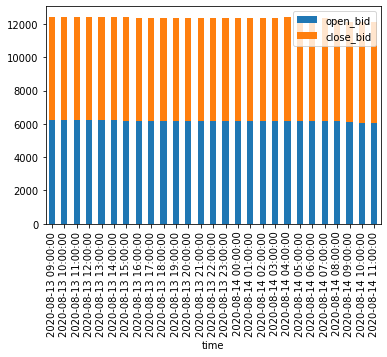

In [110]:
df.set_index('time')[['open_bid', 'close_bid']].plot.bar(stacked=True)